In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/lkild/Downloads/spambase.csv")

In [5]:
#Dataset Information
print("Dataset Characterisation:")
print("Number of Rows: {data.shape[0]}")
print("Number of Columns: {data.shape[1]}")
print("Data Types and Missing Values:")
print(data.info())

Dataset Characterisation:
Number of Rows: {data.shape[0]}
Number of Columns: {data.shape[1]}
Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive      

In [7]:
#Missing Values
missing_values = data.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")
#Punyakeerthi BL (2024). DataFrames : Handling Missing Values in Pandas - Punyakeerthi BL - Medium. [online] Medium. Available at: https://medium.com/@punya8147_26846/dataframes-handling-missing-values-in-pandas-11f7702afaf7.


Total Missing Values: 341


In [9]:
#Target Variable Distribution
target_column = 'is_spam'  
print("Target Variable Distribution:")
print(data[target_column].value_counts(normalize=True) * 100)

Target Variable Distribution:
is_spam
False    60.595523
True     39.404477
Name: proportion, dtype: float64


In [11]:
#Rename columns for better readability
data.columns = [col.strip().replace(' ', '_').lower() for col in data.columns]

In [13]:
#Remove unnecessary columns
#Assuming 'unnamed:_0' is an index column and not required
if 'unnamed:_0' in data.columns:
    data.drop(columns=['unnamed:_0'], inplace=True)

In [15]:
#Convert columns to numeric where possible
data = data.apply(pd.to_numeric, errors='coerce')

In [17]:
#Remove duplicates
data = data.drop_duplicates()

In [19]:
#Handle missing values (NaNs)
#Fill missing values with the median of each column
data = data.fillna(data.median(numeric_only=True))

In [21]:
#Summarize the cleaning process
cleaned_info = {
    "Shape after cleaning": data.shape,
    "Duplicate rows removed": data.duplicated().sum(),
    "Missing values after cleaning": data.isnull().sum().sum()}

In [23]:
#Output the summary of the cleaning process
print("Data Cleaning Summary:")
for key, value in cleaned_info.items():
    print(f"{key}: {value}")

#Display first few rows of cleaned data
data.head()

Data Cleaning Summary:
Shape after cleaning: (4218, 58)
Duplicate rows removed: 8
Missing values after cleaning: 0


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [25]:
#Create a copy of the data for cleaning
data_cleaned = data.copy()

#Rename columns using a dictionary comprehension
data_cleaned.columns = data_cleaned.columns.str.replace("_", " ").str.title()

#Replace specific words for better clarity
data_cleaned.columns = data_cleaned.columns.str.replace("Word Freq", "Word Frequency")
data_cleaned.columns = data_cleaned.columns.str.replace("Char Freq", "Character Frequency")
data_cleaned.columns = data_cleaned.columns.str.replace("Is Spam", "Spam")

#Verify the renamed columns
print("Renamed Columns:")
print(data_cleaned.columns)

Renamed Columns:
Index(['Word Frequency Make', 'Word Frequency Address', 'Word Frequency All',
       'Word Frequency 3D', 'Word Frequency Our', 'Word Frequency Over',
       'Word Frequency Remove', 'Word Frequency Internet',
       'Word Frequency Order', 'Word Frequency Mail', 'Word Frequency Receive',
       'Word Frequency Will', 'Word Frequency People', 'Word Frequency Report',
       'Word Frequency Addresses', 'Word Frequency Free',
       'Word Frequency Business', 'Word Frequency Email', 'Word Frequency You',
       'Word Frequency Credit', 'Word Frequency Your', 'Word Frequency Font',
       'Word Frequency 000', 'Word Frequency Money', 'Word Frequency Hp',
       'Word Frequency Hpl', 'Word Frequency George', 'Word Frequency 650',
       'Word Frequency Lab', 'Word Frequency Labs', 'Word Frequency Telnet',
       'Word Frequency 857', 'Word Frequency Data', 'Word Frequency 415',
       'Word Frequency 85', 'Word Frequency Technology', 'Word Frequency 1999',
       'Word Fre

In [27]:
#Check for any remaining NaN values in the cleaned dataset
missing_values_total = data_cleaned.isnull().sum().sum()

if missing_values_total == 0:
    print("All NaN values have been successfully cleaned!")
else:
    print(f"There are still {missing_values_total} NaN values remaining in the dataset.")

All NaN values have been successfully cleaned!


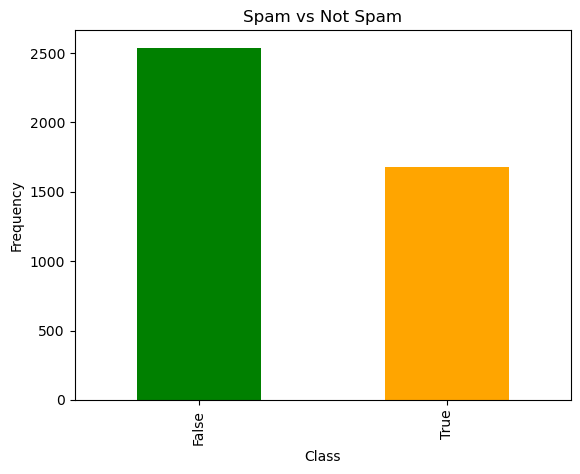

In [29]:
# Target Variable Distribution
data_cleaned['Spam'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title("Spam vs Not Spam")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


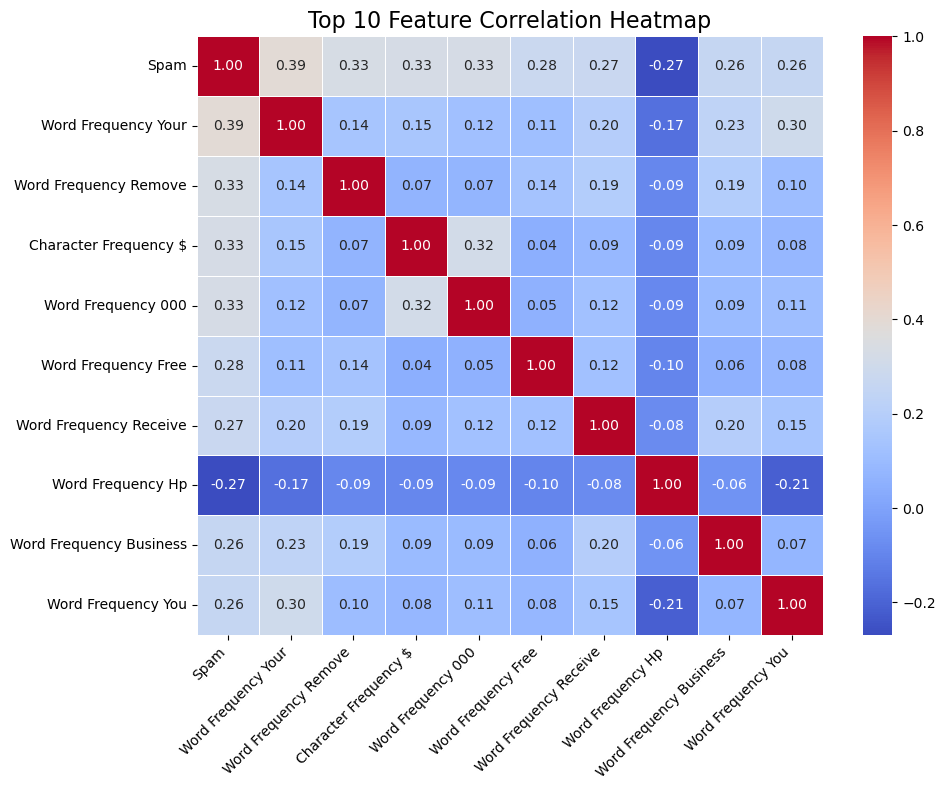

In [31]:
# Correlation Heatmap
correlation_matrix=data_cleaned.corr()

top_features=correlation_matrix['Spam'].abs().sort_values(ascending=False).head(10).index
top_correlation_matrix=data_cleaned[top_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(top_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Top 10 Feature Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
#Mlcourse.ai. (2023). Visual data analysis in Python. Part 1. Visualization: from Simple Distributions to Dimensionality Reduction — mlcourse.ai. [online] Available at: https://mlcourse.ai/book/topic02/topic02_visual_data_analysis.html [Accessed 21 Dec. 2024].


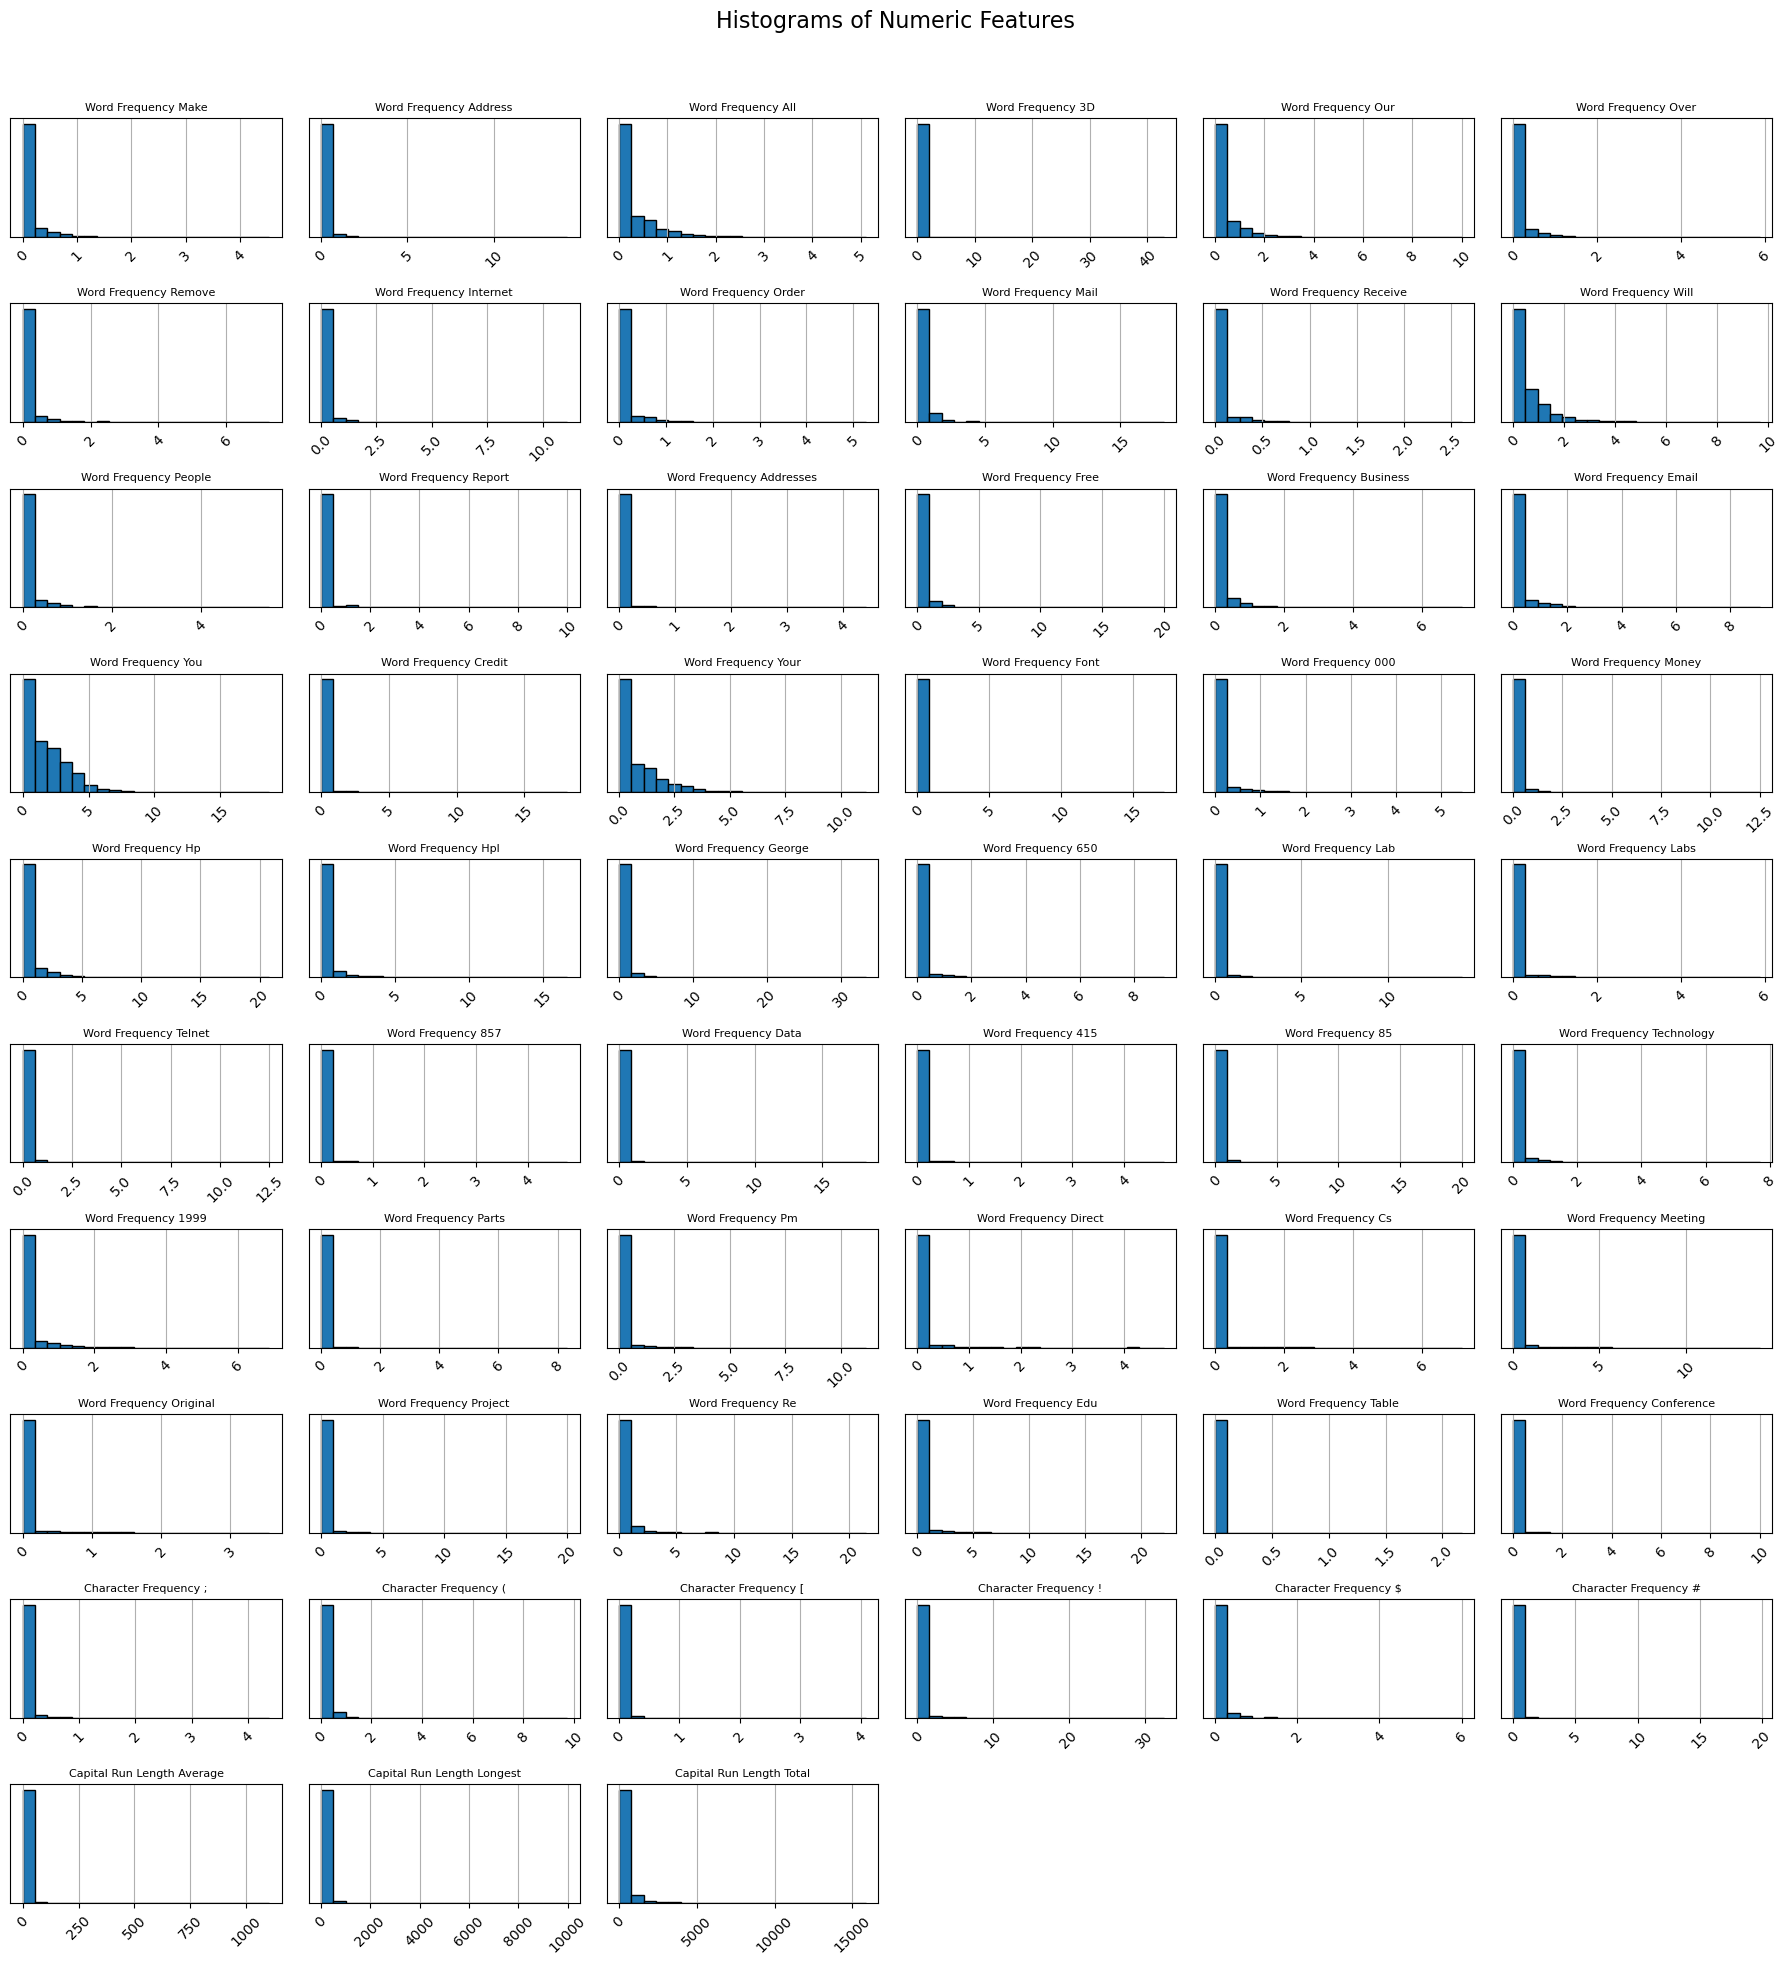

In [35]:
#Create histogram
fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(18, 20))  
axes = axes.flatten()  

#Loop through columns and create histograms
for i, col in enumerate(data_cleaned.columns):
    if data_cleaned[col].dtype in ['float64', 'int64']: 
        data_cleaned[col].hist(ax=axes[i], bins=20, edgecolor='black')
        axes[i].set_title(col, fontsize=8)  
        axes[i].tick_params(axis='x', rotation=45)  
        axes[i].set_yticks([])  
    else:
        axes[i].axis('off')  

#Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

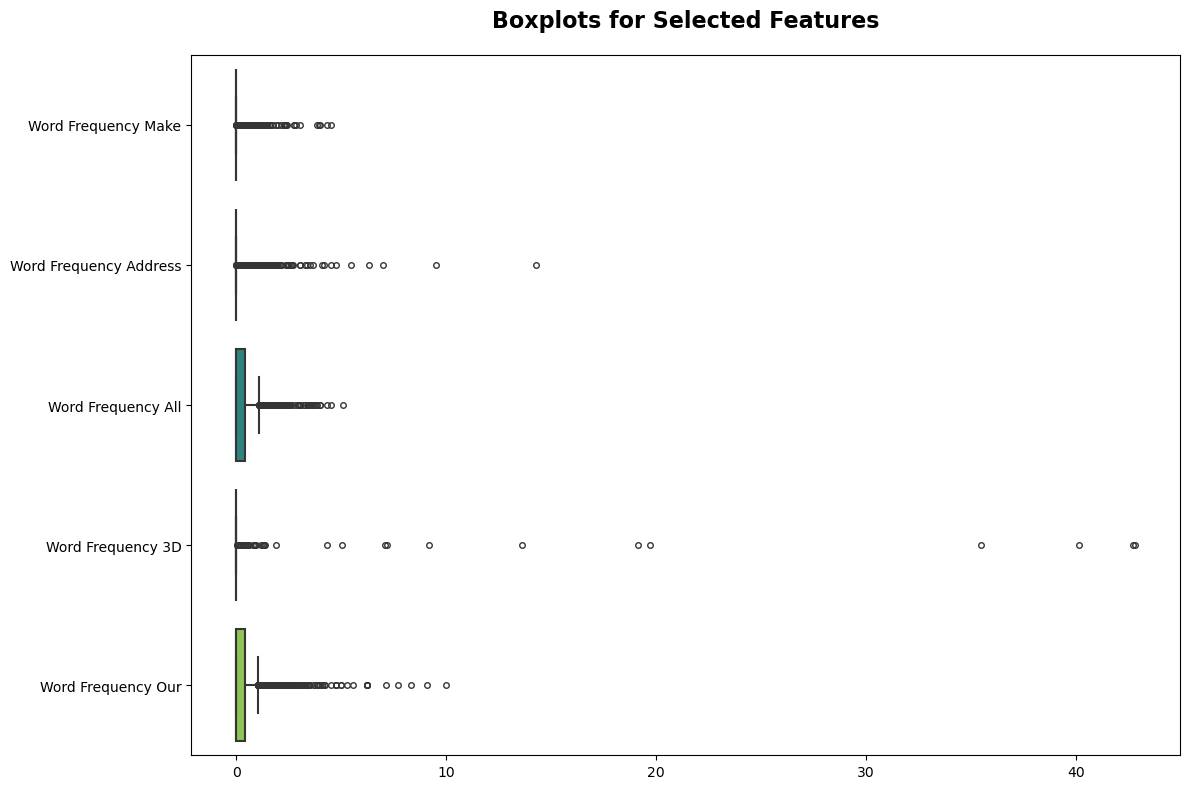

In [36]:
# Boxplots for Selected Features
selected_columns = data_cleaned.select_dtypes(include='number').columns[:5]  # Example: First 5 columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[selected_columns], orient="h", palette="viridis", linewidth=1.5, fliersize=4, whis=1.5)
plt.title("Boxplots for Selected Features",fontsize=16,weight="bold", pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Standardize the numeric data
scaler = StandardScaler()
numeric_data = data_cleaned.select_dtypes(include='number')
scaled_data = scaler.fit_transform(numeric_data)

# Select numeric columns for standardization
numeric_columns = data_cleaned.select_dtypes(include='number').columns

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numeric data
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# Verify the standardization
print(data_cleaned[numeric_columns].describe())

       Word Frequency Make  Word Frequency Address  Word Frequency All  \
count         4.218000e+03            4.218000e+03        4.218000e+03   
mean          4.042917e-17            2.695278e-17        2.695278e-17   
std           1.000119e+00            1.000119e+00        1.000119e+00   
min          -3.475516e-01           -2.477777e-01       -5.646230e-01   
25%          -3.475516e-01           -2.477777e-01       -5.646230e-01   
50%          -3.475516e-01           -2.477777e-01       -5.646230e-01   
75%          -3.475516e-01           -2.477777e-01        2.892333e-01   
max           1.479997e+01            3.121972e+01        9.332347e+00   

       Word Frequency 3D  Word Frequency Our  Word Frequency Over  \
count       4.218000e+03        4.218000e+03         4.218000e+03   
mean        6.738196e-18        2.695278e-17        -5.390557e-17   
std         1.000119e+00        1.000119e+00         1.000119e+00   
min        -4.660001e-02       -4.726103e-01        -3.49

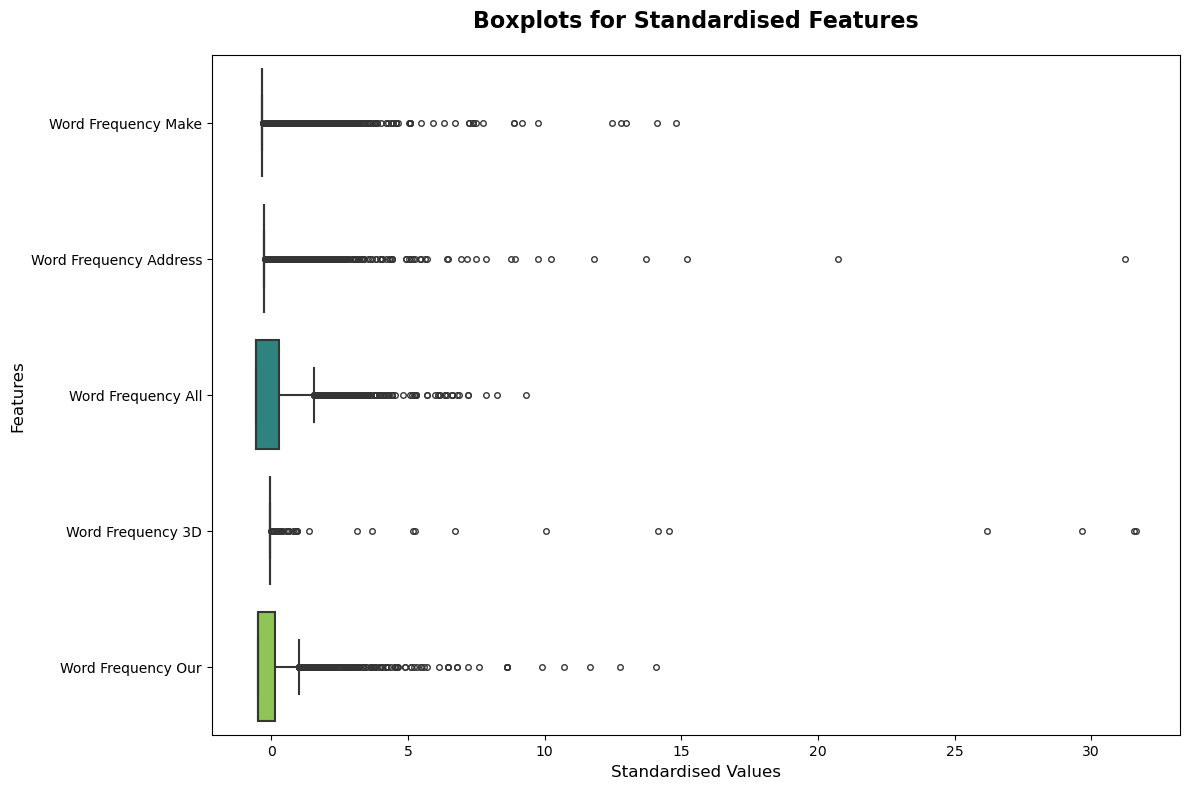

In [41]:
#Boxplots after standardisation
plt.figure(figsize=(12,8))
sns.boxplot(data=data_cleaned[selected_columns],
            orient="h",
            palette="viridis",
            linewidth=1.5,
            fliersize=4)
plt.title("Boxplots for Standardised Features", fontsize=16, weight="bold",pad=20)
plt.xlabel("Standardised Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()